In [1]:
print("https://ned.ipac.caltech.edu/conesearch?in_csys=Equatorial&in_equinox=J2000&coordinates=17h15m22.992s%20%2B57d24m40.33s&radius=45&hconst=67.8&omegam=0.308&omegav=0.692&wmap=4&corr_z=1&z_constraint=Between&z_value1=6000&z_value2=10000&z_unit=km%2Fs&ot_include=ANY&in_objtypes1%5BGalaxies%5D=Galaxies&in_objtypes1%5BGPairs%5D=GPairs&in_objtypes1%5BGTriples%5D=GTriples&in_objtypes1%5BGGroups%5D=GGroups&in_objtypes1%5BGClusters%5D=GClusters&in_objtypes1%5BQSO%5D=QSO&in_objtypes1%5BQSOGroups%5D=QSOGroups&in_objtypes1%5BGravLens%5D=GravLens&in_objtypes1%5BAbsLineSys%5D=AbsLineSys&in_objtypes1%5BEmissnLine%5D=EmissnLine&in_objtypes2%5BRadio%5D=Radio&in_objtypes2%5BSmmS%5D=SmmS&in_objtypes3%5BSupernovae%5D=Supernovae&in_objtypes3%5BEmissnObj%5D=EmissnObj&in_objtypes3%5BEmissnNeb%5D=EmissnNeb&nmp_op=ANY&search_type=Near%20Position%20Search&out_csys=Same%20as%20Input&out_equinox=Same%20as%20Input&obj_sort=Distance%20to%20search%20center")

https://ned.ipac.caltech.edu/conesearch?in_csys=Equatorial&in_equinox=J2000&coordinates=17h15m22.992s%20%2B57d24m40.33s&radius=45&hconst=67.8&omegam=0.308&omegav=0.692&wmap=4&corr_z=1&z_constraint=Between&z_value1=6000&z_value2=10000&z_unit=km%2Fs&ot_include=ANY&in_objtypes1%5BGalaxies%5D=Galaxies&in_objtypes1%5BGPairs%5D=GPairs&in_objtypes1%5BGTriples%5D=GTriples&in_objtypes1%5BGGroups%5D=GGroups&in_objtypes1%5BGClusters%5D=GClusters&in_objtypes1%5BQSO%5D=QSO&in_objtypes1%5BQSOGroups%5D=QSOGroups&in_objtypes1%5BGravLens%5D=GravLens&in_objtypes1%5BAbsLineSys%5D=AbsLineSys&in_objtypes1%5BEmissnLine%5D=EmissnLine&in_objtypes2%5BRadio%5D=Radio&in_objtypes2%5BSmmS%5D=SmmS&in_objtypes3%5BSupernovae%5D=Supernovae&in_objtypes3%5BEmissnObj%5D=EmissnObj&in_objtypes3%5BEmissnNeb%5D=EmissnNeb&nmp_op=ANY&search_type=Near%20Position%20Search&out_csys=Same%20as%20Input&out_equinox=Same%20as%20Input&obj_sort=Distance%20to%20search%20center


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import hiviewer as hv
import os
from astropy import log

In [2]:
import sys
sys.path.append('/data/inspur_disk04/FAST/xuc/FAST/obs_plan/ObsHelper/')
from opt_source import OptSource

In [3]:
ra, dec = 258.845800, 57.411203
dist = 120
self = OptSource('NGC6338', ra, dec, dist)

#### Object ####
Previous Transit time: 2023-06-30 23:34:37.000
Next Transit time: 2023-07-01 23:30:41.000
#### Sun ####
Previous Rise time: 2023-07-01 06:04:36.000
Next Set time: 2023-07-01 19:48:04.000


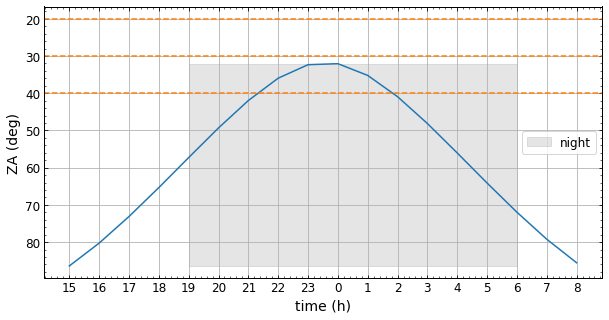

In [17]:
self.plot_ZA(BJ_time='2023-07-01 00:00:00')

In [4]:
aladin = self.ialadin(fov = 1, survey= 'SDSS9 color',)
aladin

Aladin(fov=1.0, layout=Layout(width='100%'), options=['allow_full_zoomout', 'coo_frame', 'fov', 'full_screen',…

In [5]:
# 从NED上下载具有红移信息的邻近星系
self.add_table('./NGC6338_ned_allz.csv')
self.get_sep()
aladin.add_table(self.table)

In [6]:
# 从NED上下载限制红移范围的邻近星系
self.add_table('./NGC6338_ned_search.csv')
self.get_sep()
aladin.add_table(self.table)

In [7]:
self.table

<Table length=114>
 No.         Object Name         ... Diameter Points Associations
                                 ...                             
int64           str104           ...      int64         int64    
----- -------------------------- ... --------------- ------------
    1                   NGC 6338 ...              11            0
    2           SDSS-C4-DR3 3152 ...               0            0
    3             NGC 6338 GROUP ...               0            0
    4                 VII Zw 700 ...               1            0
    5         VII Zw 700 NOTES02 ...               0            0
    6         VII Zw 700 NOTES01 ...               6            0
    7 NGC 6338 GROUP:[AJF2017] S ...               0            0
    8  WISEA J171532.47+572519.0 ...               8            0
    9           [LLH2017] Totoro ...               0            0
  ...                        ... ...             ...          ...
  105  WISEA J171545.60+575938.7 ...               8            0
  106  WISEA J171406.69+575936.9 ...              10            0
  107  WISEA J171929.72+570458.4 ...               0            0
  108  WISEA J171946.27+570727.8 ...               6            0
  109  WISEA J171144.18+565637.3 ...              10            1
  110                  LDCE 1248 ...               0            0
  111  WISEA J171207.55+575634.1 ...               8            0
  112    2MASS J17112012+5659285 ...               8            0
  113    2MASX J17192000+5754014 ...              10            2
  114  WISEA J171748.57+580318.9 ...              10            0

In [8]:
self.get_opt_image(surveys = ["DSS2 Blue"], size = 120,)#write=False)

Retrieving...


Saved ./tmp/NGC6338_DSS2 Blue_0-opt.fits
Finish!


In [9]:
from MultiBeamOTF_Time import MultiOTFcalculator
ra, dec = 258.845800, 57.411203
dist = 120
otc = MultiOTFcalculator(ra, dec, dist = dist, diff_ra= 210, diff_dec = 90)

In [10]:
otc.get_startend()
otc.input_OTF_para(direction = '-', scan_gap = 21.66, scan_speed = 15)
otc.calculate_time()

MultiBeam OTF, direction:  -
Scan gap: 21.66 arcmin
Scan speed: 15.0 arcsec / s
Scan 5.0 times along -, switch 4.0 times.
Need total 4560.0 s = 76.0 min.


In [11]:
opt = hv.FitsPic(self.optnames[0])

Showing image.
Sample time: 0.5 s


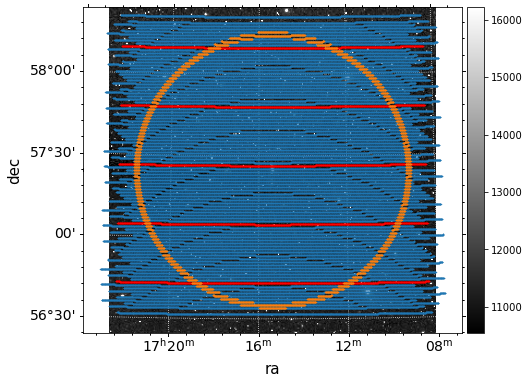

In [12]:
ax = opt.plot_slice(per_vmin_max = .99)
ax.grid(color = 'white',ls = ':')
otc.show_footprints(ax, opt, sample_time = 0.5,)
otc.plot_radius(ax, opt, radius=50, dr=1)

In [13]:
otc.start.to_string('hmsdms')

'17h22m22.992s +58d09m40.3308s'

In [14]:
otc.end.to_string('hmsdms')

'17h08m22.992s +56d39m40.3308s'